In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the CSV file
df = pd.read_csv('Filtered_Video_Games_Data.csv', header=None)  # Set header=None if there's no header

# Get the x and y values from the CSV file
image_paths = df[0].values[1:]
labels = df[3].values[1:]

# Encode the labels
encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(labels)

# Suppose you started with a list of genre names like this:
genres = ['Action', 'Adventure', 'Role-Playing', 'Sports', 'Shooter', 'Platform', 'Strategy', 'Puzzle', 'Racing', 'Simulation']

# Encode genres into integers
le = LabelEncoder()
Y = le.fit_transform(genres)

# Or build a mapping dictionary:
genre_map = {code: label for label, code in zip(encoder.classes_, encoder.transform(encoder.classes_))}
print(genre_map)

{np.int64(0): 'Action', np.int64(1): 'Adventure', np.int64(2): 'Platform', np.int64(3): 'Puzzle', np.int64(4): 'Racing', np.int64(5): 'Role-Playing', np.int64(6): 'Shooter', np.int64(7): 'Simulation', np.int64(8): 'Sports', np.int64(9): 'Strategy'}


In [ ]:
import requests
from PIL import Image
from io import BytesIO
import numpy as np

# Image processing
IMAGE_SIZE = (200, 200)
base_url = 'https://www.vgchartz.com'

def load_image(image_path):
    full_url = base_url + image_path
    response = requests.get(full_url)
    if response.status_code == 200:
        img = Image.open(BytesIO(response.content)).convert('RGB')
        img = img.resize(IMAGE_SIZE)
        return np.array(img)  # Keep 3D shape (200, 200, 3)
    else:
        raise Exception(f"Image failed to load from {full_url}")

# Load and flatten all images
X = np.array([load_image(p) for p in image_paths[:1000]])
Y = np.array(labels_encoded[:1000])

In [ ]:
# Split train/test
x_train = X[0:500]
y_train = Y[0:500]
x_test = X[500:]
y_test = Y[500:]

NameError: name 'X' is not defined

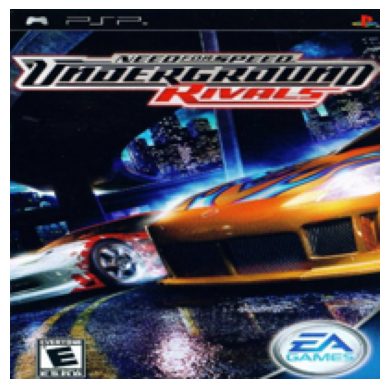

This is Racing


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Pick a random index
random_image = np.random.randint(len(Y))

# Display the image, normalize pixel values to [0,1] for matplotlib
plt.imshow(X[random_image] / 255.0)
plt.axis('off')
plt.show()

# Print label
print("This is %s" % genre_map[Y[random_image]])

In [ ]:
!pip install -q tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 113.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 111.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 114.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.2 MB/s eta 0:00:00


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1538 - loss: 2.3961

71/71 ━━━━━━━━━━━━━━━━━━━━ 255s 3s/step - accuracy: 0.1546 - loss: 2.3959 - val_accuracy: 0.4160 - val_loss: 1.8649
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3419 - loss: 2.1643

71/71 ━━━━━━━━━━━━━━━━━━━━ 235s 3s/step - accuracy: 0.3422 - loss: 2.1633 - val_accuracy: 0.5560 - val_loss: 1.5748
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 238s 3s/step - accuracy: 0.4136 - loss: 1.9299 - val_accuracy: 0.5480 - val_loss: 1.4259
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4340 - loss: 1.7889

71/71 ━━━━━━━━━━━━━━━━━━━━ 236s 3s/step - accuracy: 0.4342 - loss: 1.7886 - val_accuracy: 0.5880 - val_loss: 1.3042
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 236s 3s/step - accuracy: 0.4764 - loss: 1.6073 - val_accuracy: 0.5840 - val_loss: 1.2780
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5264 - loss: 1.5449

71/71 ━━━━━━━━━━━━━━━━━━━━ 236s 3s/step - accuracy: 0.5262 - loss: 1.5444 - val_accuracy: 0.6320 - val_loss: 1.1880
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 237s 3s/step - accuracy: 0.5558 - loss: 1.4043 - val_accuracy: 0.6160 - val_loss: 1.1857
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 237s 3s/step - accuracy: 0.5631 - loss: 1.3634 - val_accuracy: 0.6280 - val_loss: 1.1253
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 238s 3s/step - accuracy: 0.5920 - loss: 1.2069 - val_accuracy: 0.6280 - val_loss: 1.1108
Epoch 10/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 239s 3s/step - accuracy: 0.6078 - loss: 1.2135 - val_accuracy: 0.6240 - val_loss: 1.0840
Epoch 11/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 238s 3s/step - accuracy: 0.6244 - loss: 1.1038 - val_accuracy: 0.6280 - val_loss: 1.0815
Epoch 12/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6278 - loss: 1.1015

71/71 ━━━━━━━━━━━━━━━━━━━━ 235s 3s/step - accuracy: 0.6279 - loss: 1.1014 - val_accuracy: 0.6360 - val_loss: 1.0346
Epoch 13/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6495 - loss: 1.0264

71/71 ━━━━━━━━━━━━━━━━━━━━ 235s 3s/step - accuracy: 0.6496 - loss: 1.0264 - val_accuracy: 0.7200 - val_loss: 0.9451
Epoch 14/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 233s 3s/step - accuracy: 0.6809 - loss: 0.9601 - val_accuracy: 0.6760 - val_loss: 0.9675
Epoch 15/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 234s 3s/step - accuracy: 0.6696 - loss: 0.9363 - val_accuracy: 0.7040 - val_loss: 0.9278
Epoch 16/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 232s 3s/step - accuracy: 0.7008 - loss: 0.8841 - val_accuracy: 0.7120 - val_loss: 0.9031
Epoch 17/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 234s 3s/step - accuracy: 0.7178 - loss: 0.8297 - val_accuracy: 0.6600 - val_loss: 0.9527
Epoch 18/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 232s 3s/step - accuracy: 0.7292 - loss: 0.7679 - val_accuracy: 0.6440 - val_loss: 0.9331
Epoch 19/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 233s 3s/step - accuracy: 0.7481 - loss: 0.7347 - val_accuracy: 0.6920 - val_loss: 0.9027
Epoch 20/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 234s 3s/step - accuracy: 0.7560 - loss: 0.7125 - val_accuracy: 0.7120 - val_l

71/71 ━━━━━━━━━━━━━━━━━━━━ 233s 3s/step - accuracy: 0.7829 - loss: 0.6186 - val_accuracy: 0.7240 - val_loss: 0.8366
Epoch 23/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 234s 3s/step - accuracy: 0.8060 - loss: 0.5496 - val_accuracy: 0.7240 - val_loss: 0.8226
Epoch 24/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8103 - loss: 0.5366

71/71 ━━━━━━━━━━━━━━━━━━━━ 234s 3s/step - accuracy: 0.8102 - loss: 0.5366 - val_accuracy: 0.7320 - val_loss: 0.8225
Epoch 25/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8081 - loss: 0.5387

71/71 ━━━━━━━━━━━━━━━━━━━━ 233s 3s/step - accuracy: 0.8082 - loss: 0.5387 - val_accuracy: 0.7480 - val_loss: 0.8234
79/79 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.5470 - loss: 1.5602

✅ Final Test Accuracy: 51.52%
79/79 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step


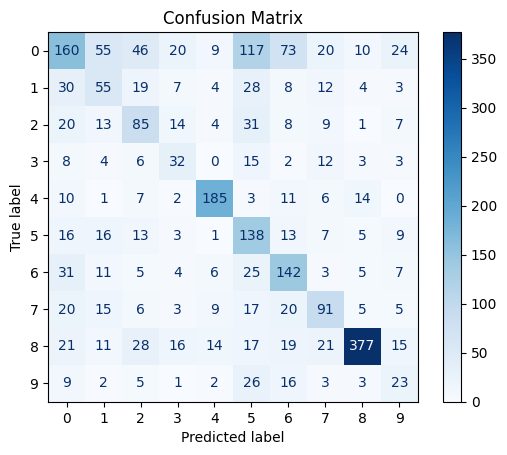

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# --- Optional: Calculate class weights (in case of imbalance) ---
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# --- Data Augmentation ---
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.15,
    horizontal_flip=True,
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    validation_split=0.1
)

train_generator = train_datagen.flow(x_train, y_train, batch_size=32, subset='training')
val_generator = train_datagen.flow(x_train, y_train, batch_size=32, subset='validation')

# --- Load EfficientNetB0 base model ---
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(200, 200, 3))

# Unfreeze last 20 layers for fine-tuning
for layer in base_model.layers[:-20]:
    layer.trainable = False
for layer in base_model.layers[-20:]:
    layer.trainable = True

# --- Add custom classification head ---
l2_reg = 1e-4
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(l2_reg))(x)
x = Dropout(0.3)(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# --- Compile model ---
model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# --- Callbacks ---
callbacks = [
    EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)
]

# --- Train the model ---
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=callbacks,
    class_weight=class_weights_dict
)

# --- Preprocess test data ---
x_test_pre = tf.keras.applications.efficientnet.preprocess_input(x_test)

# --- Evaluate on test set ---
test_loss, test_acc = model.evaluate(x_test_pre, y_test, batch_size=32)
print(f"\n✅ Final Test Accuracy: {test_acc * 100:.2f}%")

# --- Optional: Confusion Matrix ---
y_pred = model.predict(x_test_pre)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.densenet import preprocess_input

# Preprocess your data
x_train_pre = preprocess_input(x_train)
x_test_pre = preprocess_input(x_test)

# Load DenseNet121 base model with all layers frozen
base_model = DenseNet121(include_top=False, input_shape=(200, 200, 3), weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False

l2_reg = 1e-4

# Build model head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu', kernel_regularizer=l2(l2_reg))(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax', kernel_regularizer=l2(l2_reg))(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=Adam(1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Train model
history = model.fit(
    x_train_pre, y_train,
    epochs=15,
    batch_size=32,
    validation_split=0.1
)

# Evaluate model
loss, accuracy = model.evaluate(x_test_pre, y_test)
print(f"\n✅ DenseNet121 Test Accuracy: {accuracy * 100:.2f}%")

# Predictions and confusion matrix
y_pred = model.predict(x_test_pre)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


NameError: name 'x_train' is not defined